In [107]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from obsq.utils.core import convert_df_to_gdf
path = "/home/manat/projects/obsq/work/dev/data/data.duckdb"
target = 'expert_match'


In [108]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM features.observer""" ).df()
con.close()


In [109]:
df.shape

(2875, 29)

In [110]:
df.describe()

,observations_count,total_pct,class_count,order_count,family_count,genus_count,species_count,unique_month_count,unique_year_count,unique_dates,...,avg_coord_un,max_coord_un,avg_media_count,sex_meta_pct,reproductiveCondition_meta_pct,annotations_meta_pct,avg_id_time,avg_description_len,avg_species_obs_count,max_species_obs_count
count,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,...,2875.000000,2875.000000,2829.000000,2875.000000,2875.000000,2875.000000,2871.000000,309.000000,2875.000000,2875.000000
mean,16.930435,0.000347,1.738087,4.865739,6.443826,9.231652,10.457391,1.669913,1.528696,4.916522,...,148.742794,368.960696,1.425182,0.084315,1.340042,0.370379,59.590387,48.647249,1.139718,1.861913
std,95.227571,0.001957,1.021648,6.384463,11.409986,22.600212,29.148944,1.138885,1.327455,14.945435,...,361.636023,703.608149,0.859853,0.552448,6.558446,3.248928,228.102326,56.253905,1.795155,7.677162
min,1.000000,0.000020,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000020,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.333000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000
50%,3.000000,0.000060,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,19.200000,37.000000,1.000000,0.000000,0.000000,0.000000,2.000000,34.000000,1.000000,1.000000
75%,7.000000,0.000140,2.000000,6.000000,6.000000,7.000000,7.000000,2.000000,1.000000,3.000000,...,92.250000,265.500000,1.500000,0.000000,0.571000,0.000000,27.000000,58.000000,1.000000,1.000000
max,3565.000000,0.073240,5.000000,39.000000,98.000000,247.000000,359.000000,5.000000,15.000000,250.000000,...,2946.000000,2998.000000,11.200000,13.545000,160.847000,146.138000,3527.000000,588.000000,92.000000,277.000000


In [111]:
df.describe(include=[object], exclude= [float, int])

,recordedBy
count,2875
unique,2875
top,viandemoisie
freq,1


In [112]:
pprint(df.columns.to_list())

['recordedBy',
 'observations_count',
 'total_pct',
 'class_count',
 'order_count',
 'family_count',
 'genus_count',
 'species_count',
 'unique_month_count',
 'unique_year_count',
 'unique_dates',
 'max_yearly_observations',
 'max_monthly_observations',
 'avg_yearly_observations',
 'avg_monthly_observations',
 'expert_ids',
 'expert_ids_pct',
 'high_cood_un_obs',
 'high_cood_un_pct',
 'avg_coord_un',
 'max_coord_un',
 'avg_media_count',
 'sex_meta_pct',
 'reproductiveCondition_meta_pct',
 'annotations_meta_pct',
 'avg_id_time',
 'avg_description_len',
 'avg_species_obs_count',
 'max_species_obs_count']


In [113]:
def plot_dist(df,col, log:bool = False):
    output = "/home/manat/projects/obsq/work/dev/data/eda/features/observers"

    f, axs = plt.subplots(1, 3, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4,4]))
    sns.ecdfplot(df, x = col, ax=axs[0], log_scale= log)
    sns.kdeplot(df, x = col, ax=axs[1],log_scale= log)
    sns.histplot(df, x = col, ax=axs[2],log_scale= log, bins=10)

    f.suptitle(f"Observer distribution of {col}")

    f.savefig(f"{output}/{col}_dist.jpg", dpi = 300, bbox_inches="tight")

    plt.show()

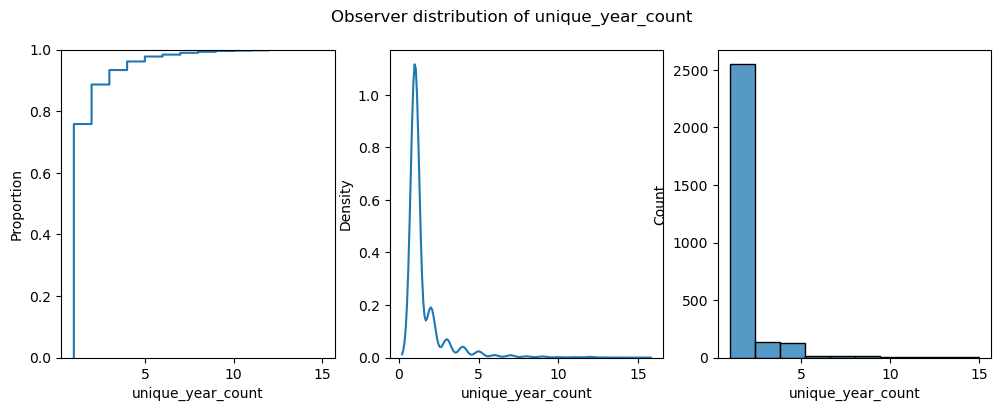

In [114]:
plot_dist(df,"unique_year_count")


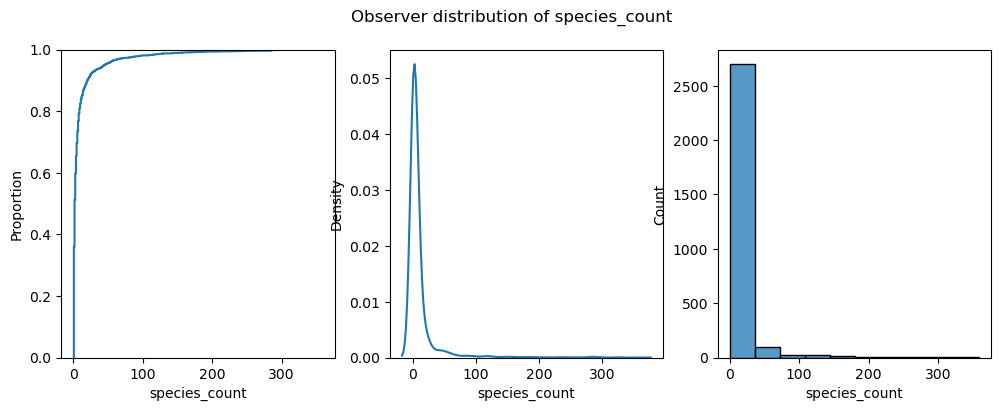

In [115]:
plot_dist(df, "species_count")

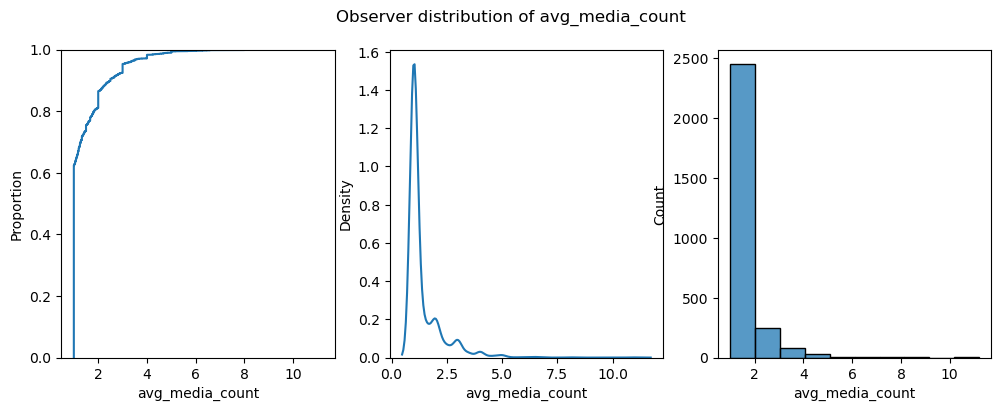

In [116]:
plot_dist(df, "avg_media_count")

In [117]:
#plot_dist(df, "expert_match_count")

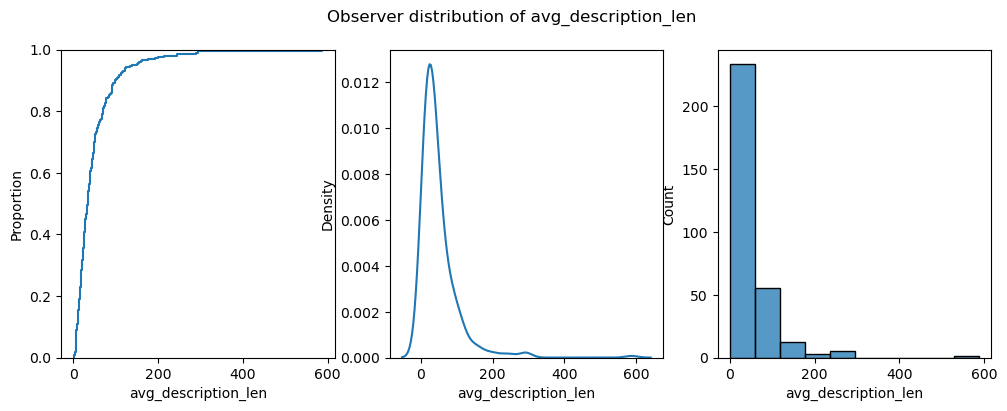

In [118]:
plot_dist(df, "avg_description_len")

/home/manat/miniconda3/envs/obsq/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/tmp/ipykernel_227139/1164000575.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x = col, ax=axs[1],log_scale= log)


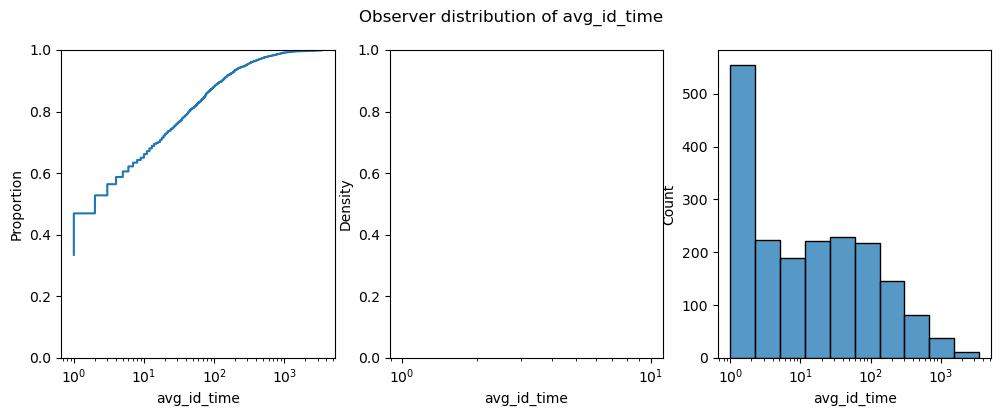

In [119]:
plot_dist(df, "avg_id_time", log=True)

/home/manat/miniconda3/envs/obsq/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/tmp/ipykernel_227139/1164000575.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x = col, ax=axs[1],log_scale= log)


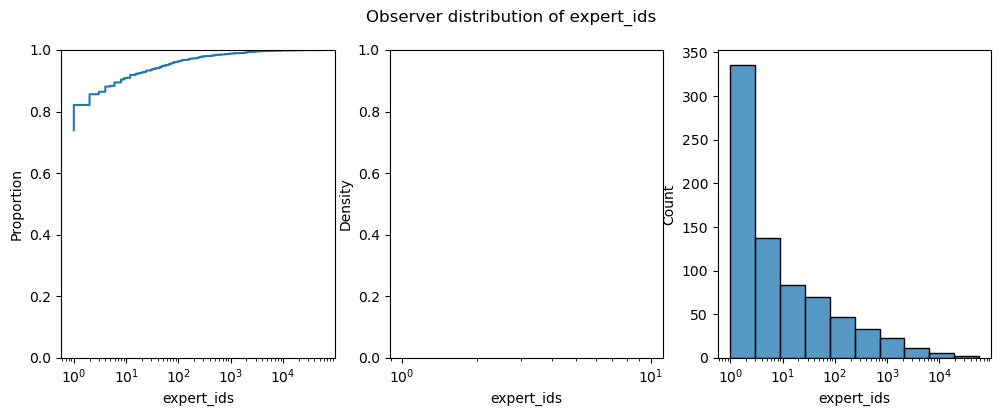

In [120]:
plot_dist(df, "expert_ids", log=True)


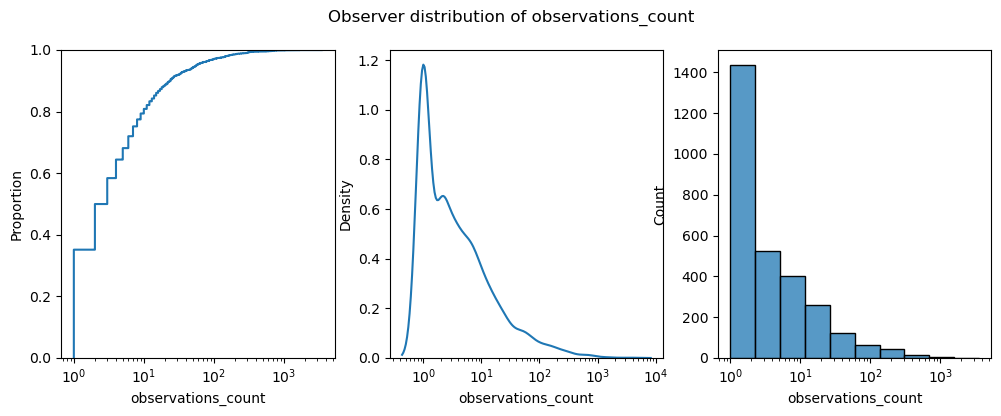

In [121]:
plot_dist(df, "observations_count", log=True)